In [140]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [141]:
# Carga de todos los csv en la carpeta 'mediciones'
files = os.listdir('mediciones')

# Lista de dataframes
dfs = [pd.read_csv('mediciones/' + file) for file in files]

# Nombre de las futuras columnas
columns = [f.replace(".csv", "") for f in files ]


In [142]:
# Verifico que todos los dataframes tengan la misma columna de tiempo
time_cols = [df['time'].tolist() for df in dfs]
for i, time_col in enumerate(time_cols):
    if time_col != time_cols[0]:
        print(f'Dataframe {i} es diferente!')
        break
    else:
        print(f'Df {i} vs 0: Todas las filas son iguales')

Df 0 vs 0: Todas las filas son iguales
Df 1 vs 0: Todas las filas son iguales
Df 2 vs 0: Todas las filas son iguales
Df 3 vs 0: Todas las filas son iguales
Df 4 vs 0: Todas las filas son iguales
Df 5 vs 0: Todas las filas son iguales
Df 6 vs 0: Todas las filas son iguales
Df 7 vs 0: Todas las filas son iguales


In [143]:
# Concatenate all dataframes with first colum 'time' and '(V)' columns
df = pd.concat([df['(V)'] for df in dfs], axis=1)
df.columns = columns
df['time'] = time_cols[0]

# Make 'time' column the index
df.set_index('time', inplace=True)

# Reordeno columnas usando parte numerica del nombre
columns = sorted(columns, key=lambda x: int(x[:-2]))
df = df[columns]

df.head()

,181mm,261mm,552mm,644mm,743mm,839mm,927mm,1042mm
time,,,,,,,,
0.000,0.355050,0.347517,0.357561,0.360072,0.360072,0.360072,0.357561,0.355050
0.005,0.355050,0.355050,0.365094,0.357561,0.367605,0.360072,0.357561,0.357561
0.010,0.355050,0.347517,0.355050,0.367605,0.365094,0.362583,0.357561,0.357561
0.015,0.357561,0.339984,0.357561,0.362583,0.357561,0.357561,0.350028,0.357561
0.020,0.347517,0.355050,0.357561,0.362583,0.355050,0.360072,0.365094,0.357561


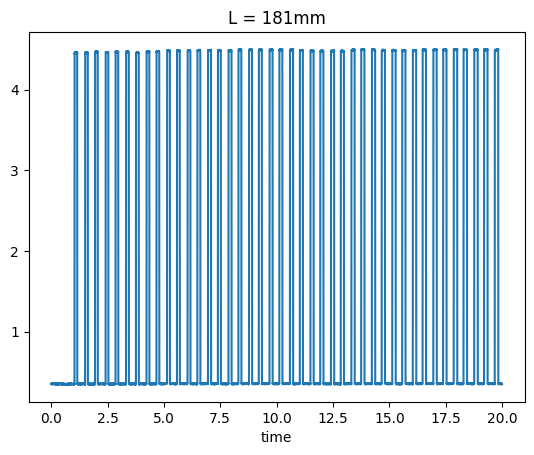

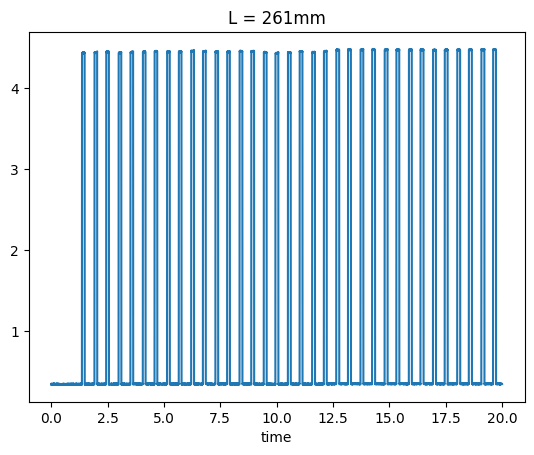

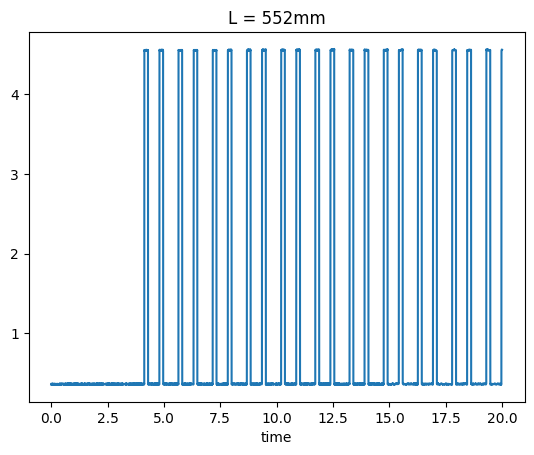

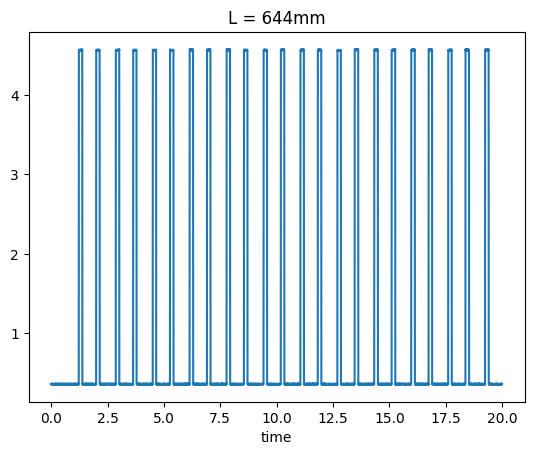

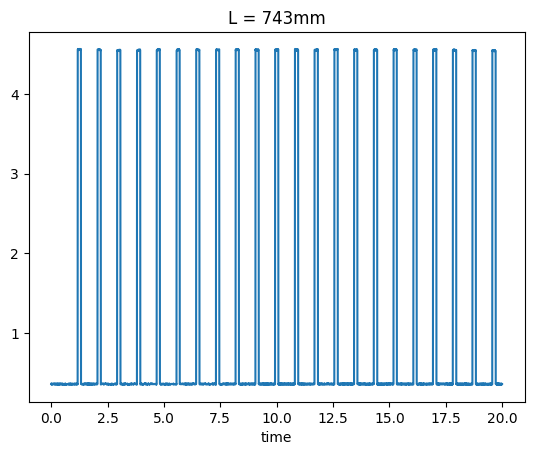

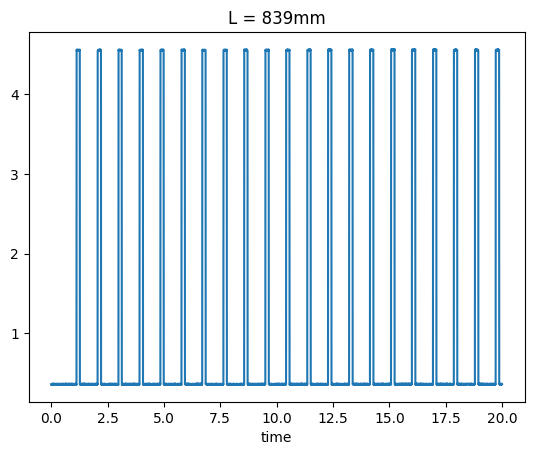

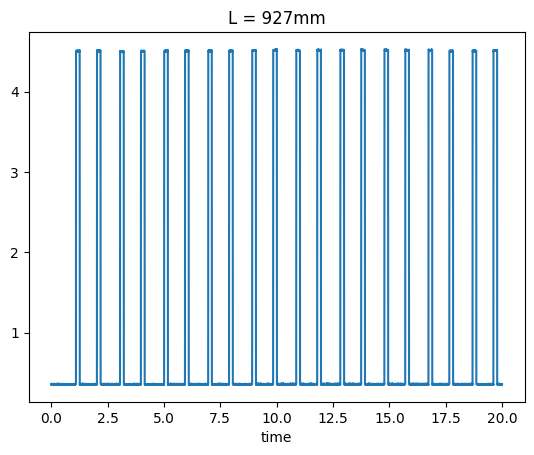

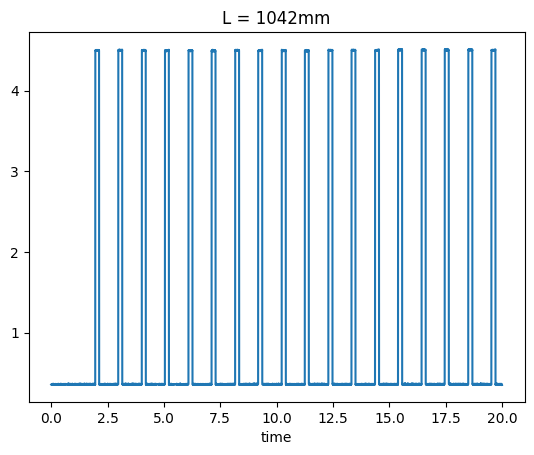

In [144]:
for c in columns:
    df[c].plot()
    plt.title(f"L = {c}")
    plt.show()

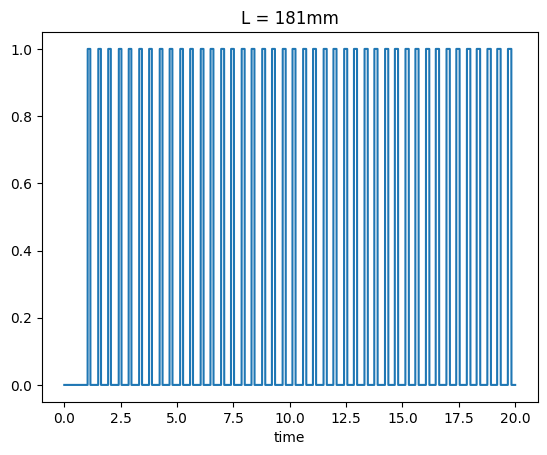

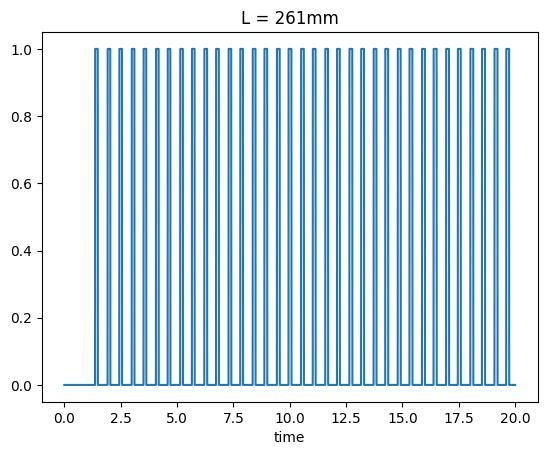

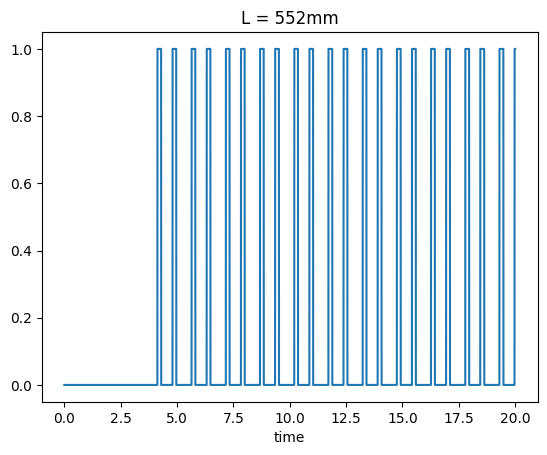

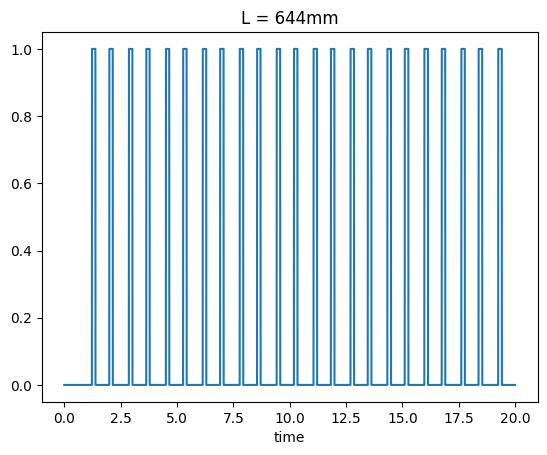

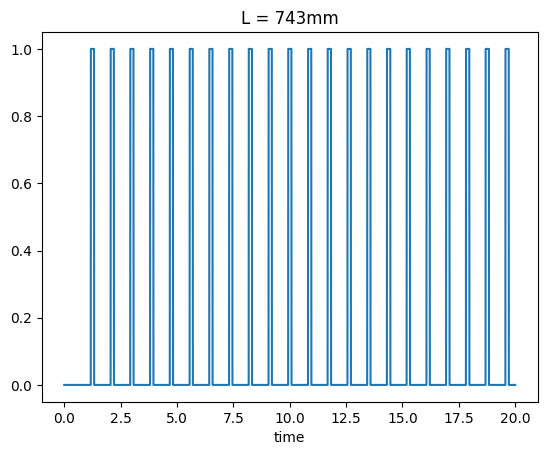

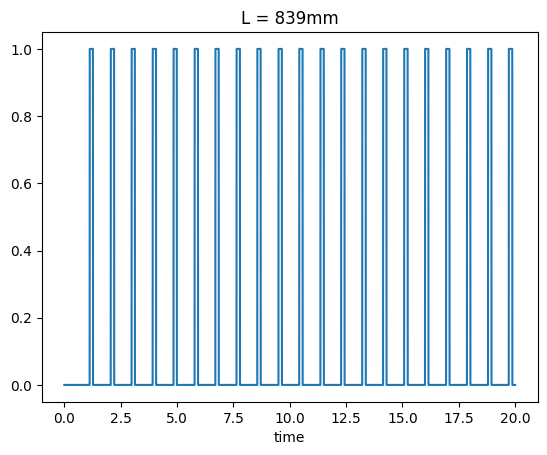

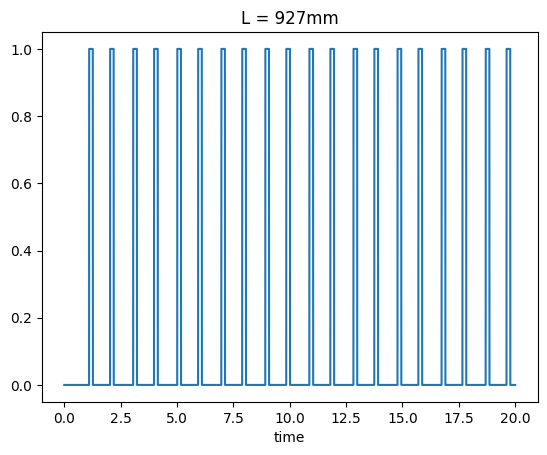

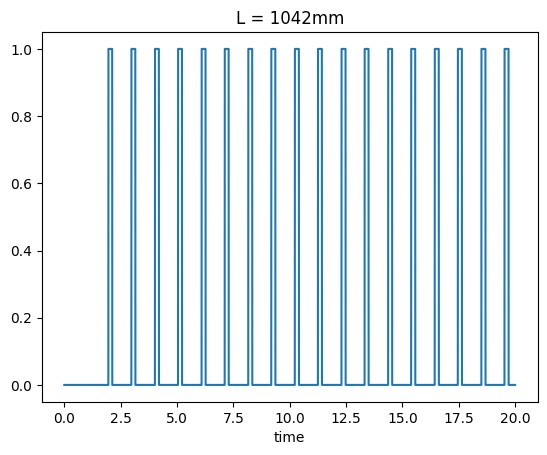

In [145]:
# Duplicate and digitalize each column: if greater than 3 set it to 1, else 0
df_digital = df.apply(lambda x: x > 3).astype(int)

# Plot digitalized signals
for c in columns:
    df_digital[c].plot()
    plt.title(f"L = {c}")
    plt.show()


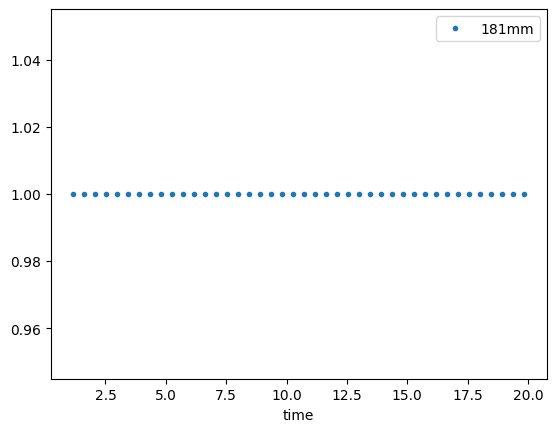

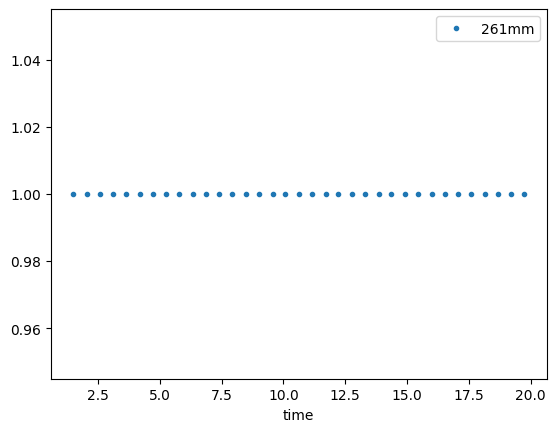

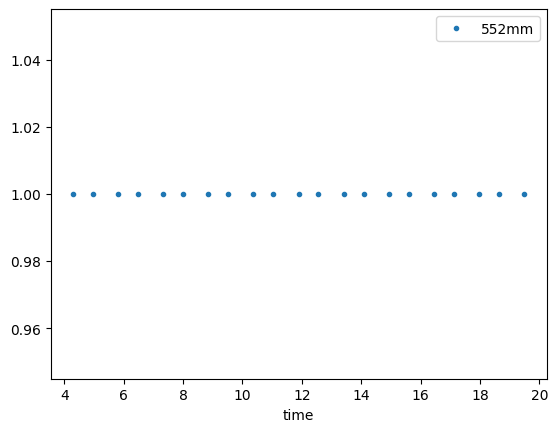

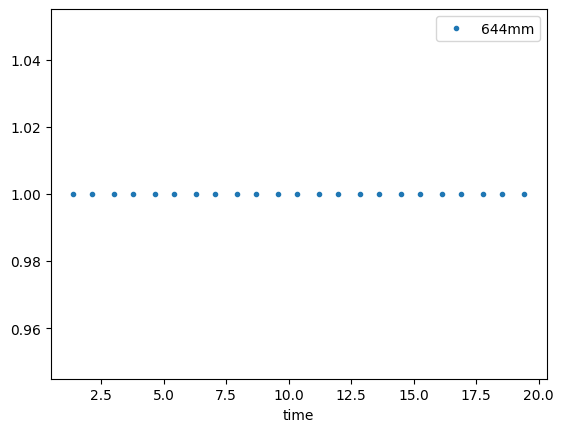

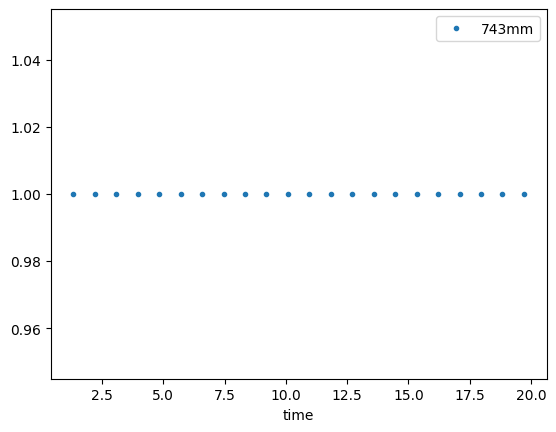

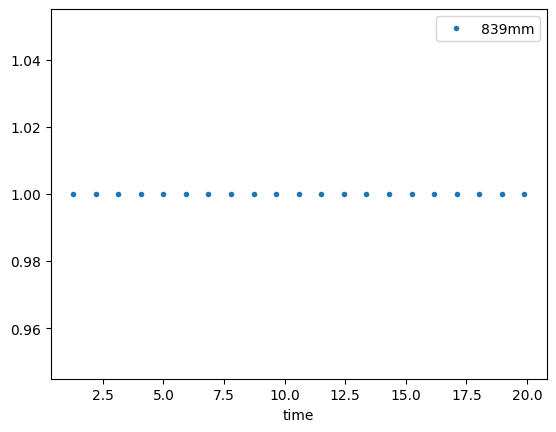

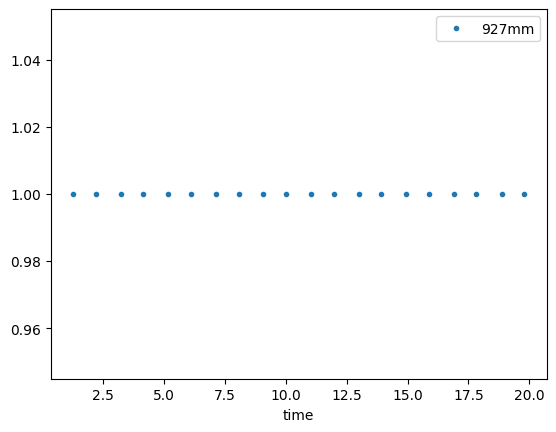

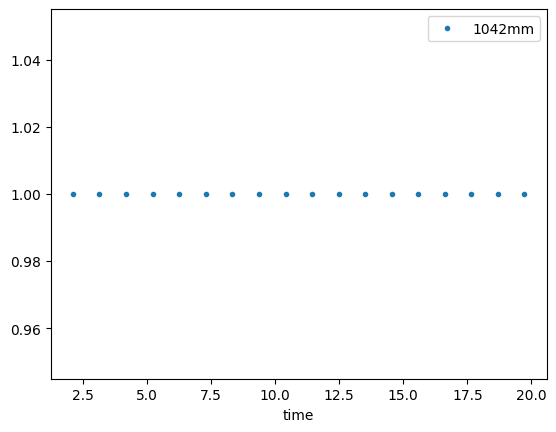

In [146]:
# Creo lista de dataframes solo con los comienzos de cada pulso
starts_dfs = [df_digital[c].diff().apply(lambda x: x == -1).astype(int) for c in columns]

# Borro filas con zeros de cada df
starts_dfs = [df[df == 1].dropna() for df in starts_dfs]

for s in starts_dfs:
    s.plot(style='.')
    plt.legend()
    plt.show()

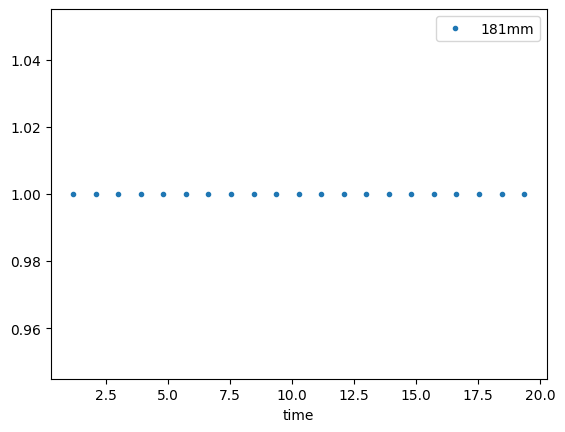

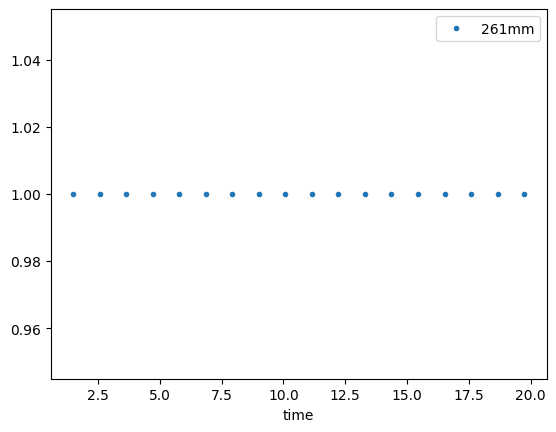

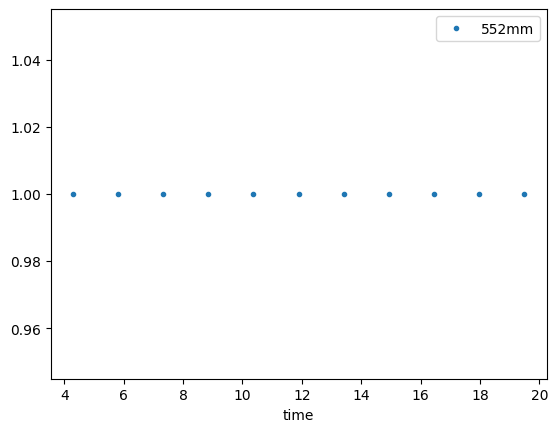

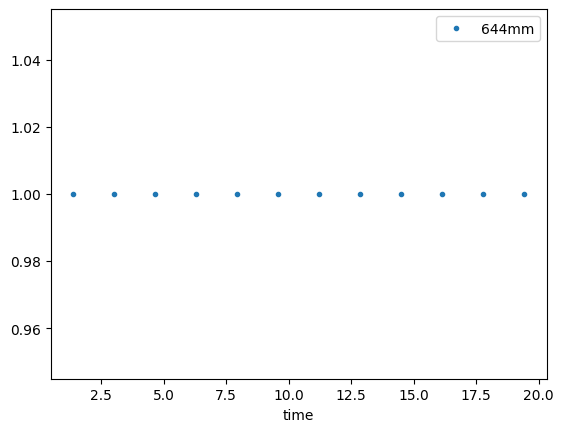

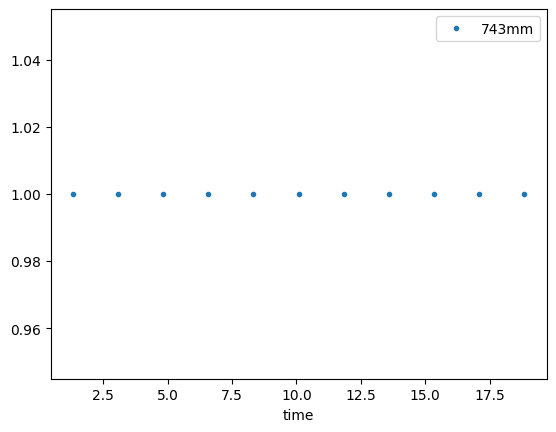

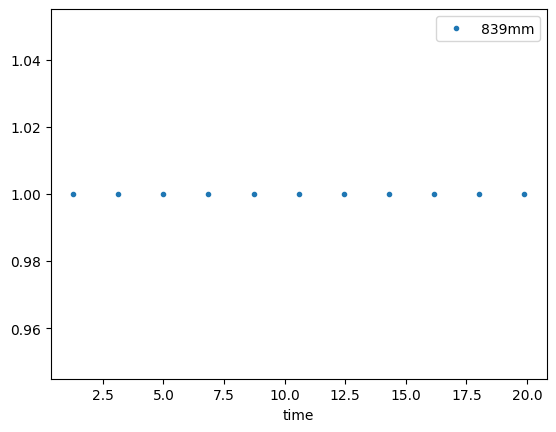

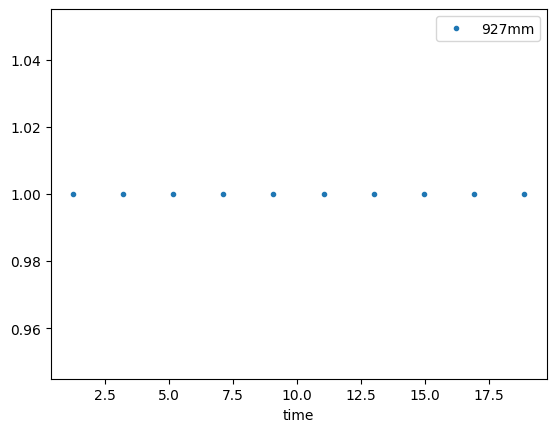

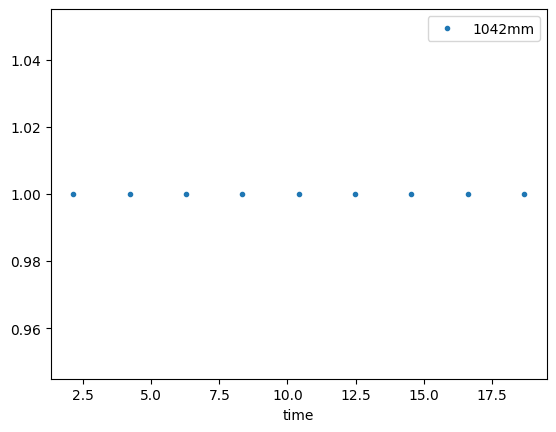

In [147]:
# Descarto elementos pares de cada df
period_dfs = [df.iloc[::2] for df in starts_dfs]

for p in period_dfs:
    p.plot(style='.')
    plt.legend()
    plt.show()

In [148]:
# Reset index for each df and set colum names
period_dfs = [df.reset_index(inplace=False) for df in period_dfs]


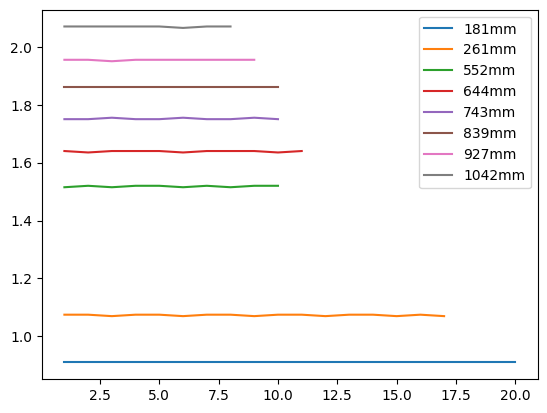

In [149]:
for i in range(len(period_dfs)):
    period_dfs[i]['time'].diff().plot()

plt.legend(columns)
plt.show()

In [172]:
duraciones = [df['time'].diff().dropna().values for df in period_dfs]

period_means = [np.mean(d) for d in duraciones]
period_stds = [np.std(d) for d in duraciones]

for c, m, s in zip(columns, period_means, period_stds):
    print(f"L = {c}")
    print(f"Periodo medio:   {m:.6f}")
    print(f"Desvio estandar: {s:.6f}")
    L = float(c.replace("mm", "")) / 1000
    T = 2 * np.pi * np.sqrt(L / 9.79687)
    # Local gravity https://www.sensorsone.com/local-gravity-calculator/#local-gravity
    print(f"Periodo esperado: {T:.6f}")
    print(f"Error: {abs(T - m):.6f}")
    print(f"Error: {abs(T - m) / T * 100:.6f}%")
    print("-"*50)


L = 181mm
Periodo medio:   0.910000
Desvio estandar: 0.000000
Periodo esperado: 0.854035
Error: 0.055965
Error: 6.553056%
--------------------------------------------------
L = 261mm
Periodo medio:   1.073235
Desvio estandar: 0.002389
Periodo esperado: 1.025549
Error: 0.047686
Error: 4.649823%
--------------------------------------------------
L = 552mm
Periodo medio:   1.518000
Desvio estandar: 0.002449
Periodo esperado: 1.491440
Error: 0.026560
Error: 1.780841%
--------------------------------------------------
L = 644mm
Periodo medio:   1.638636
Desvio estandar: 0.002227
Periodo esperado: 1.610939
Error: 0.027697
Error: 1.719322%
--------------------------------------------------
L = 743mm
Periodo medio:   1.751500
Desvio estandar: 0.002291
Periodo esperado: 1.730337
Error: 0.021163
Error: 1.223078%
--------------------------------------------------
L = 839mm
Periodo medio:   1.860000
Desvio estandar: 0.000000
Periodo esperado: 1.838727
Error: 0.021273
Error: 1.156960%
-------------